In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath_prices = '/Users/hermannviktor/Python/PycharmProjects/15.459-Fin-Data-Science-II/Project 2/Project_E_Q2_Prices.xlsx'
filepath_returns = '/Users/hermannviktor/Python/PycharmProjects/15.459-Fin-Data-Science-II/Project 2/Project_E_Q2_Returns.xlsx'

In [3]:
px_df = pd.read_excel(filepath_prices)
px_df = px_df.set_index('Date')

In [41]:
def scatterplotting(x_df, y_df, xlabel, ylabel):
    idx = np.isfinite(x_df) & np.isfinite(y_df)
    a,b = np.polyfit(x_df[idx],y_df[idx],1)
    c = min(x_df[idx])
    d = max(x_df[idx])
    x = np.array([c, d])
    y = a * x + b
    textstr = 'y = {var}*x + {coef}'.format(var=a.round(3),coef=b.round(5))
    _ = plt.scatter(x_df[idx],y_df[idx], color='lightgreen')
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.plot(x,y,color='red', linewidth=2)
    _ = plt.text(0.1,0.1,textstr)
    plt.show()

# Prices

### SPX on SP1

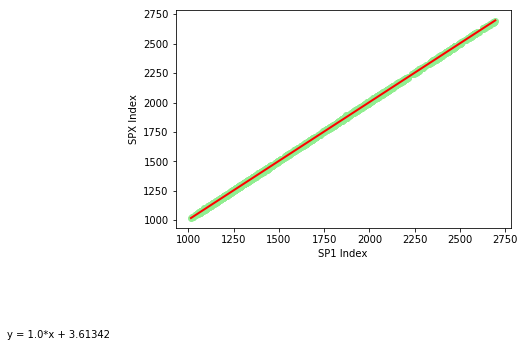

In [42]:
scatterplotting(px_df['SP1_Index'],px_df['SPX_Index'],'SP1 Index','SPX Index')

### SPY on SPX

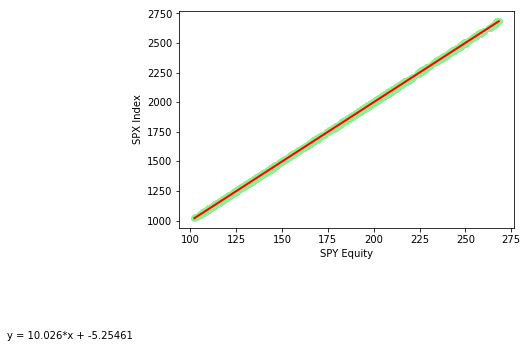

In [44]:
scatterplotting(px_df['SPY_Equity'],px_df['SPX_Index'],'SPY Equity','SPX Index')

### GLD on Gold Commodity

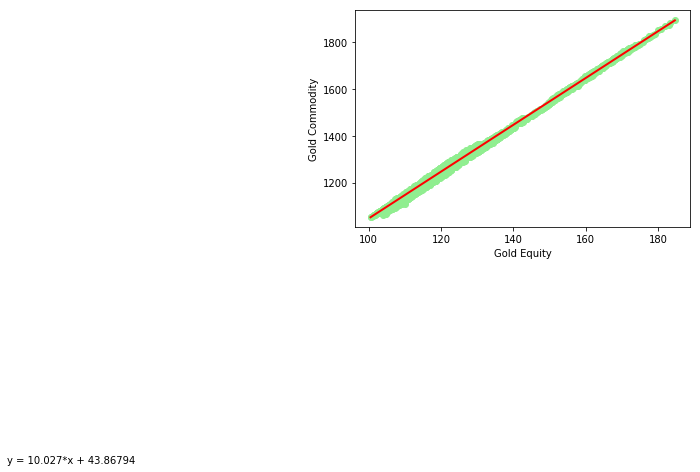

In [45]:
scatterplotting(px_df['GLD_Equity'],px_df['GLD_CMDTY'],'Gold Equity','Gold Commodity')

### TVIX on VIX

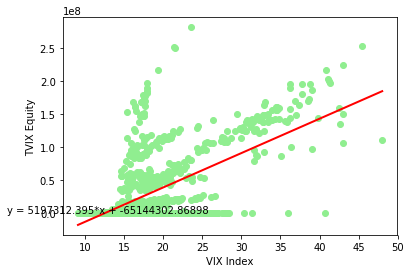

In [46]:
scatterplotting(px_df['VIX_Index'],px_df['TVIX_Equity'],'VIX Index','TVIX Equity')

# Returns

In [36]:
ret_df = pd.read_excel(filepath_returns)
ret_df = ret_df.set_index('Date')

### SPX on SP1

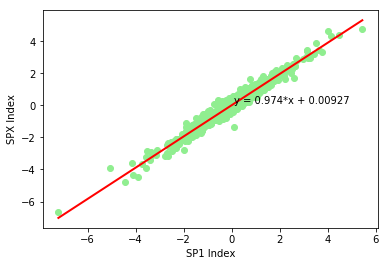

In [47]:
scatterplotting(ret_df['SP1_Index'],ret_df['SPX_Index'],'SP1 Index','SPX Index')

### SPY on SPX

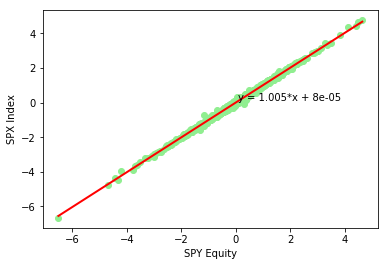

In [48]:
scatterplotting(ret_df['SPY_Equity'],ret_df['SPX_Index'],'SPY Equity','SPX Index')

### Gold on Gold Commodity

In [49]:
scatterplotting(ret_df['GLD_Equity'],ret_df['GLD_CMDTY'],'Gold Equity','Gold Commodity')

TypeError: expected non-empty vector for x

### TVIX on VIX

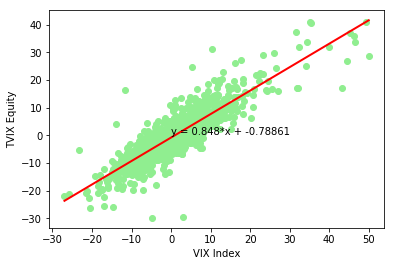

In [51]:
scatterplotting(ret_df['VIX_Index'],ret_df['TVIX_Equity'],'VIX Index','TVIX Equity')